# Exploring and comparing Rose Scent profiles stored as tabular data packages with ggplot2 R library

*Philippe Rocca-Serra (philippe.rocca-serra[at]oerc.ox.ac.uk), University of Oxford e-Research Centre

## Background: 

Experimental results such as metabolite profiling data published in [1,2] can be straightfowardly reported using [OKFN Data Packages](https://frictionlessdata.io/specs/tabular-data-package/). Such components can be easily parsed into R and exploited with rich graphical libraries, such as the well know ggplot2 (https://ggplot2.tidyverse.org/). A few line of codes allow to query datasets and rapidly explore the information. Most importantly, this rapid exploration is possible because of independent variables and their levels have been clearly and unambiguously declared in the Tabular Data Package itself.


1. Let's begin by installing the R packages allowing easy access and use of data formatted as JSON Data Package

In [1]:
install.packages("ggplot2")
install.packages("readr")
install.packages("devtools")


The downloaded binary packages are in
	/var/folders/5n/rl6lqnks4rqb59pbtpvvntqw0000gr/T//Rtmpup8PJc/downloaded_packages

The downloaded binary packages are in
	/var/folders/5n/rl6lqnks4rqb59pbtpvvntqw0000gr/T//Rtmpup8PJc/downloaded_packages

The downloaded binary packages are in
	/var/folders/5n/rl6lqnks4rqb59pbtpvvntqw0000gr/T//Rtmpup8PJc/downloaded_packages


In [2]:
library(ggplot2) 
library(readr)
library(devtools)

Loading required package: usethis


2. Here, we install an additional library, providing some additional customization of graphs and plots.

In [3]:
install_github("kassambara/easyGgplot2") 
library(easyGgplot2) 

Skipping install of 'easyGgplot2' from a github remote, the SHA1 (cb017c1c) has not changed since last install.
  Use `force = TRUE` to force installation


3. Reading the data:

We now simply read in the comma-separated-file associated with the tabular data package (a "long" table)

In [4]:
# rose arome nature genetics data from 2018 and plotting for the different treatment groups:
# rosedata <- read_csv("../data/processed/rose-data/rose-aroma-naturegenetics2018-treatment-group-mean-sem-report-table-example.csv")
rosedata <- read_csv("https://zenodo.org/api/files/ba3fbc84-14af-4858-a9ed-e6cfe8d4efd2/rose-aroma-naturegenetics2018-treatment-group-mean-sem-report-table-example.csv")

Parsed with column specification:
cols(
  chemical_name = col_character(),
  inchi = col_character(),
  chebi_identifier = col_character(),
  var1_levels = col_character(),
  var1_uri = col_character(),
  var2_levels = col_character(),
  var2_uri = col_character(),
  treatment = col_character(),
  sample_size = col_double(),
  sample_mean = col_double(),
  unit = col_logical(),
  sem = col_double()
)


4. Plotting the data: We then generate a barplot using the ggplot2 library.

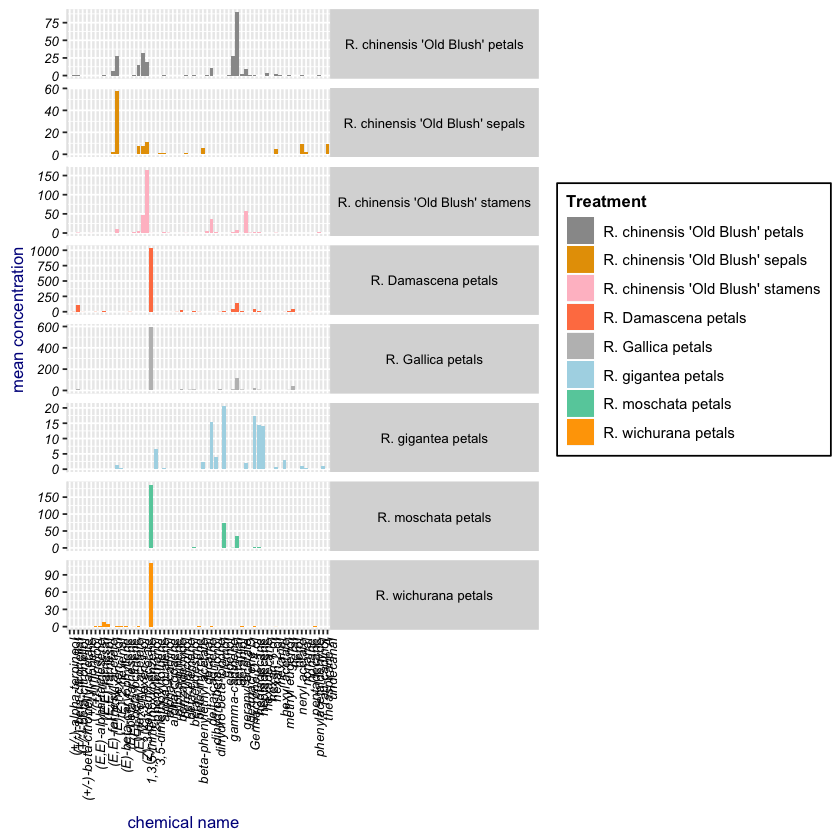

In [5]:
ggplot2.barplot(data=rosedata, xName="chemical_name", yName="sample_mean", faceting=TRUE, facetingVarNames="treatment", facetingDirection="vertical",facetingScales="free", groupName="treatment", groupColors=c('#999999','#E69F00','pink','coral','grey','lightblue','aquamarine3','orange'), xtitle="chemical name",ytitle="mean concentration", xtitleFont=c(10,"plain","darkblue"),ytitleFont=c(10,"plain","darkblue"), xTickLabelFont=c(8,"italic", "black"), yTickLabelFont=c(8,"italic","black"), legendPosition="right",legendTitle="Treatment", legendTitleFont=c(10, "bold", "black"), legendTextFont=c(9, "plain", "black"), legendBackground=c("white", 0.5, "solid", "black" )) + theme(axis.text.x=element_text(angle=90, hjust=1),strip.text.y = element_text(angle=0, colour="black",face="plain",size=8))

5. Let's now compare the dataset generated in 2015 and the dataset generated in 2018.

Both datasets have been generated by the same team, on the same genotype (Rosa Chinensis 'Old Blush') and organism part ('sepals'). Both datasets are held in a Tabular Data Package with the same structure. To perform the comparison, we have simply created another tabular data package, which retains the exact same structure and that simply holds the measurements for the relevant conditions extracted from each dataset (the function to create such file is omitted).

In [6]:
# rose arome nature genetics data from 2018 and plotting for the different treatment groups:
# ng2018sc2015 <- read_csv("../data/processed/rose-data/rose_aroma_compound_science2015_vs_NG2018_data_integration.csv")
ng2018sc2015 <- read_csv("https://zenodo.org/api/files/268f29fc-8ead-4049-bb86-181b72073682/rose_aroma_compound_science2015_vs_NG2018_data_integration.csv")


Parsed with column specification:
cols(
  chemical_name = col_character(),
  inchi = col_character(),
  chebi_identifier = col_character(),
  var1_levels = col_character(),
  var1_uri = col_character(),
  var2_levels = col_character(),
  var2_uri = col_character(),
  treatment = col_character(),
  sample_size = col_character(),
  sample_mean = col_double(),
  normalized_to_total_sum_concentration = col_double(),
  unit = col_logical(),
  sem = col_double(),
  publication_year = col_double(),
  journal = col_character()
)


6. We generate another barplot, which shows the concentration of the chemicals targeted by the GC-MS profiling assay.

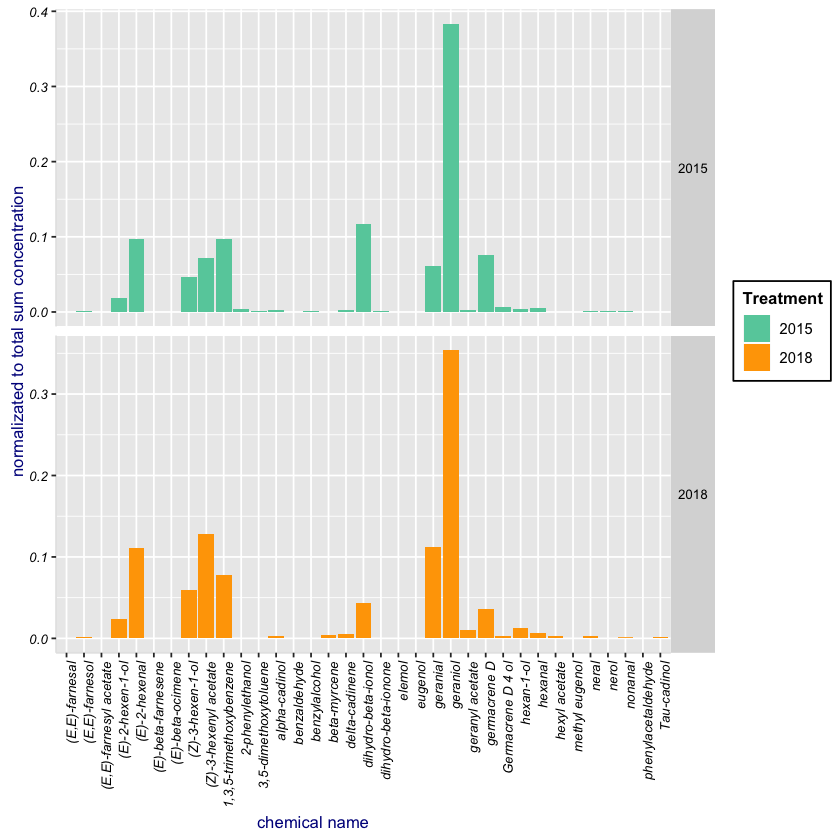

In [7]:
ggplot2.barplot(data=ng2018sc2015, xName="chemical_name", yName="normalized_to_total_sum_concentration", faceting=TRUE, facetingVarNames="publication_year", facetingDirection="vertical",facetingScales="free", groupName="publication_year", groupColors=c('aquamarine3','orange'), xtitle="chemical name",ytitle="normalizated to total sum concentration", xtitleFont=c(10,"plain","darkblue"),ytitleFont=c(10,"plain","darkblue"), xTickLabelFont=c(8,"italic", "black"), yTickLabelFont=c(8,"italic","black"),  legendPosition="right", legendTitle="Treatment", legendTitleFont=c(10, "bold", "black"),           legendTextFont=c(9, "plain", "black"), legendBackground=c("white", 0.5, "solid", "black" ))  + theme(axis.text.x=element_text(angle=90, hjust=1),strip.text.y = element_text(angle=0, colour="black",face="plain",size=8))

What do we see? The figure shows how consistant the chemical profile of the scent between the 2 studies is, which prevalent compounds such as X, Y, and Z showing roughtly similar relative amount within and across studies.

#### Bibliographic Reference:

[1.Magnard JL, Roccia A, Caissard JC, Vergne P, Sun P, Hecquet R, Dubois A, Hibrand-Saint Oyant L, Jullien F, Nicolè F, Raymond O, Huguet S, Baltenweck R, Meyer S, Claudel P, Jeauffre J, Rohmer M, Foucher F, Hugueney P, Bendahmane M, Baudino S. PLANT VOLATILES. Biosynthesis of monoterpene scent compounds in roses. Science. 2015 Jul 3;349(6243):81-3.](https://doi.org/10.1126/science.aab0696)

[2.Raymond O, Gouzy J, Just J, Badouin H, Verdenaud M, Lemainque A, Vergne P, Moja S, Choisne N, Pont C, Carrère S, Caissard JC, Couloux A, Cottret L, Aury JM, Szécsi J, Latrasse D, Madoui MA, François L, Fu X, Yang SH, Dubois A, Piola F, Larrieu A, Perez M, Labadie K, Perrier L, Govetto B, Labrousse Y, Villand P, Bardoux C, Boltz V, Lopez-Roques C, Heitzler P, Vernoux T, Vandenbussche M, Quesneville H, Boualem A, Bendahmane A, Liu C, Le Bris M, Salse J, Baudino S, Benhamed M, Wincker P, Bendahmane M. The Rosa genome provides new insights into the domestication of modern roses. Nat Genet. 2018 Jun;50(6):772-777.](https://doi.org/10.1038/s41588-018-0110-3)
